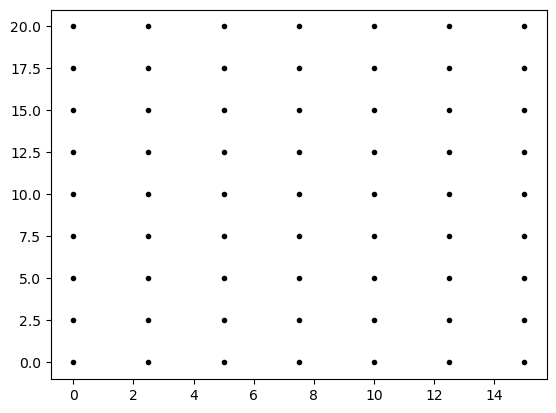

In [6]:
#  Este código es útil para resolver la ecuación de laplace con condiciones de dirichlet y neumman
import numpy as np
import matplotlib.pyplot as plt
# Figura a resolver
dx = dy = 2.5
Lx = 15
Ly = 20
Nx = int(Lx/dx + 1) # nodos en x
Ny = int(Ly/dy + 1) # nodos en y

x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly,Ny)

# Malla de puntos
X,Y = np.meshgrid(x,y)

plt.plot(X,Y,'.k')


In [4]:
y

array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ])